## Homework 03 - Nicholas Petr 

### 1 - Consider the following LP problem:

max x: −3x1+4x2

−x1+x2≤0

−x1+2x2≤2

x1≥1

x2≤3

x1, x2≥0

### 1A. Plot all linear constraints and the objective function at the optimal level

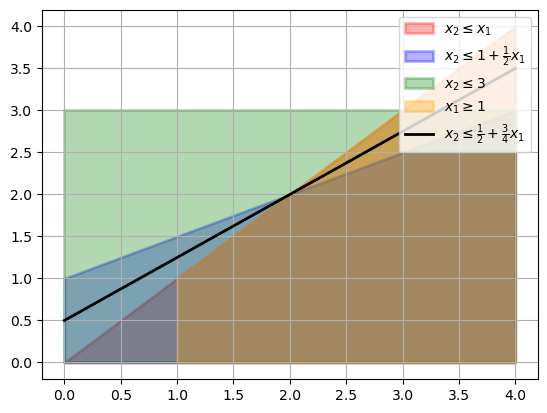

In [1]:
using PyPlot
clf();

x1 = collect(0:0.1:4);
x2a = x1;
x2b = ifelse.(1 .+ 0.5*x1 .>=0, 1 .+ 0.5*x1, NaN);
x2c = ifelse.(3 .- 0*x1 .>=0, 3 .- 0*x1, NaN);
x2d = ifelse.(0 .+ 1*x1 .>=1, 0 .+ 1*x1, NaN);
x2z = ifelse.(0.5 .+ 0.75*x1 .>=0, 0.5 .+ 0.75*x1, NaN);

fig, ax = subplots();
ax.fill_between(x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 1 + \frac{1}{2}x_{1}",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2c,color="green",linewidth=2,label=L"x_{2} \leq 3",alpha=0.3);
ax.legend(loc="upper right");
ax.fill_between(x1,x2d,color="orange",linewidth=2,label=L"x_{1} \geq 1",alpha=0.3);
ax.legend(loc="upper right");
ax.plot(x1,x2z,color="black",linewidth=2,label=L"x_{2} \leq \frac{1}{2} + \frac{3}{4}x_{1}",alpha=1);
ax.legend(loc="upper right");
ax.grid(true);

### 1B. Produce a table with all possible basic solutions and their respective objective function values. Determine the solution.

In [2]:
using JuMP, GLPK, LinearAlgebra

c = [3;  -4; 0; 0]
A = [-1 1 1 0;
     -1 2 0 1]

m, n = size(A)

b = [0; 2]

x_lb = [1;   0;   0;   0];
x_ub = [Inf; 3; Inf; Inf];

println("The rank of the matrix A: ", rank(A))
println("The number of linear restrictions: ", m)
println("The number of variables: ",n)
println("Number of basic solutions n!/m!(n-m)!: ",factorial(n)/(factorial(m)*factorial(n-m)))

The rank of the matrix A: 2
The number of linear restrictions: 2
The number of variables: 4
Number of basic solutions n!/m!(n-m)!: 6.0


In [3]:
using DataFrames, DataFramesMeta, Combinatorics, LinearAlgebra

combs = collect(combinations(1:n, m))
resual = DataFrame(comb_1=NaN,comb_2=NaN,x_B_1=NaN,x_B_2=NaN,z=NaN)

for i in 1:length(combs)
    
    comb = combs[i,]
    B = A[:, comb]
    c_B = c[comb]
    x_B = inv(B)*b

    if minimum(x_B)>=0
        z = dot(c_B, x_B)
    else 
        z = Inf
    end
    
    if i==1
        resual = DataFrame(comb_1=comb[1],comb_2=comb[2],x_B_1=x_B[1],x_B_2=x_B[2],z=z)
    else
        push!(resual, ([comb[1],comb[2],x_B[1],x_B[2],z]))
    end
end
sort(resual,:z,rev=false)

,comb_1,comb_2,x_B_1,x_B_2,z
,Int64,Int64,Float64,Float64,Float64
1,1,2,2.0,2.0,-2.0
2,1,4,0.0,2.0,0.0
3,2,4,0.0,2.0,0.0
4,3,4,0.0,2.0,0.0
5,1,3,-2.0,-2.0,Inf
6,2,3,1.0,-1.0,Inf


#### Optimal values: x1 = 2, x2 = 2. Objective value: -2 (rewritten as min in standard form)

### 1C. Solve the problem using the step by step simplex method discussed in the lecture. Verify that the solution is the same as in item B.

In [4]:
using LinearAlgebra, Combinatorics

function is_nonnegative(x::Vector)
  return length( x[ x .< 0] ) == 0
end

function search_BFS(c, A, b)
  m, n = size(A)
  @assert rank(A) == m

  opt_x = zeros(n)
  obj = Inf

  for b_idx in combinations(1:n, m)
    B = A[:, b_idx]
    c_B = c[b_idx]
    x_B = inv(B) * b

    if is_nonnegative(x_B)
      z = dot(c_B, x_B)
      if z < obj
        obj = z
        opt_x = zeros(n)
        opt_x[b_idx] = x_B
      end
    end

    println("Basis:", b_idx)
    println("\t x_B = ", x_B)
    println("\t nonnegative? ", is_nonnegative(x_B))
    if is_nonnegative(x_B)
      println("\t obj = ", dot(c_B, x_B))
    end

  end

  return opt_x, obj
end

search_BFS (generic function with 1 method)

In [5]:
println("Simplex method: ")
opt_x, obj = search_BFS(c, A, b)

Simplex method: 
Basis:[1, 2]
	 x_B = [2.0, 2.0]
	 nonnegative? true
	 obj = -2.0
Basis:[1, 3]
	 x_B = [-2.0, -2.0]
	 nonnegative? false
Basis:[1, 4]
	 x_B = [0.0, 2.0]
	 nonnegative? true
	 obj = 0.0
Basis:[2, 3]
	 x_B = [1.0, -1.0]
	 nonnegative? false
Basis:[2, 4]
	 x_B = [0.0, 2.0]
	 nonnegative? true
	 obj = 0.0
Basis:[3, 4]
	 x_B = [0.0, 2.0]
	 nonnegative? true
	 obj = 0.0


([2.0, 2.0, 0.0, 0.0], -2.0)

#### Looking at the output, we can see that the simplex method returns the same solution as 1B, with X1=2, X2=2 and the objective function = -2 (standard form)

### D. Solve the problem using the LP solver from Julia. Verify that the solution coincide with the solution in items B and C.

In [6]:
using JuMP, GLPK

myModel = Model(GLPK.Optimizer)

@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@variable(myModel, x3 >= 0)
@variable(myModel, x4 >= 0)
@constraint(myModel, −x1 + x2 + x3 == 0)
@constraint(myModel, -x1 + 2*x2 + x4 == 2)
@constraint(myModel, x1 >= 1)
@constraint(myModel, x2 <= 3)
@objective(myModel, Min, -1*(-3*x1 + 4*x2))
print(myModel)

In [7]:
@time begin
    status = optimize!(myModel)
end
println("Objective value: ", JuMP.objective_value(myModel))
println("x1 = ", JuMP.value(x1))
println("x2 = ", JuMP.value(x2))

  2.031837 seconds (5.50 M allocations: 406.937 MiB, 6.27% gc time, 99.95% compilation time)
Objective value: -2.0
x1 = 2.0
x2 = 2.0


#### As we can see, the LP solver outputs the same solution as 1B and 1C, with X1=2, X2=2 and the objective value = -2 (standard form)

### 2 - The table outlined in the assignment presents hypothetical bid/ask quotes for four major currencies at a given date/time:

#### You were given USD  1  to attempt an arbitrage trade, assume no transaction costs.

#### 2A. Write down a linear programming problem to buy and sell quantities of the base currencies and arbitrage/profit of at most USD  10k .

DE =  quantity of dollars changed into euros

DP = quantity of dollars changed into pounds

DY = quantity of dollars changed into yen

ED = quantity of euros changed into dollars 

EP = quantity of euros changed into dollars 

EY = quantity of euros changed into yen

PD = quantity of pounds changed into dollars 

PE = quantity of pounds changed into euros

PY = quantity of pounds changed into yen

YD = quantity of yen changed into dollars 

YD = quantity of yen changed into euros

YD = quantity of yen changed into pounds

D = Dollars generated through arbitrage 

In [8]:
ED_b = 0.87060 #EUR/USD bid price
ED_a = 0.87063 #EUR/USD ask price

PD_b = 1.42790 #GBP/USD bid price
PD_a = 1.42796 #GPB/USD ask price

DY_b = 133.330 #USD/JPY bid price
DY_a = 133.333 #USD/JPY ask price

EP_b = 0.60970 #EUR/GBP bid price
EP_a = 0.60972 #EUR/GBP ask price

EY_b = 116.140 #EUR/JPY bid price
EY_a = 116.144 #EUR/JPY ask price

PY_b = 190.480 #GBP/JPY bid price
PY_a = 190.476; #GBP/JPY ask price

In [9]:
using JuMP, GLPK, LinearAlgebra

myModel = Model(GLPK.Optimizer)
@variable(myModel, DE >= 0)
@variable(myModel, DP >= 0)
@variable(myModel, DY >= 0)
@variable(myModel, ED >= 0)
@variable(myModel, EP >= 0)
@variable(myModel, EY >= 0)
@variable(myModel, PD >= 0)
@variable(myModel, PE >= 0)
@variable(myModel, PY >= 0)
@variable(myModel, YD >= 0)
@variable(myModel, YE >= 0)
@variable(myModel, YP >= 0)
@variable(myModel, 10000 >= D >= 0)

#Dollars 
@constraint(myModel, D .+ DE .+ DP .+ DY .- ED_b*ED .- PD_b*PD .- (1/DY_a)*YD == 1)

# Euros
@constraint(myModel, ED .+ EP .+ EY .- (1/ED_a)*DE .- (1/EP_a)*PE .- (1/EY_a)*YE == 0)

# Pounds 
@constraint(myModel, PD .+ PE .+ PY .- (1/PD_a)*DP .- EP_b*EP .- (1/PY_a)*YP == 0)

# Yen
@constraint(myModel, YD .+ YE .+ YP .- DY_b*DY .- EY_b*EY .- PY_b*PY == 0)

@objective(myModel, Max, D)

print(myModel)

#### 2B. Solve for the buy/sell quantities and the arbitrage/profit amount.

In [10]:
status = optimize!(myModel)

println("Arbitrage/Profit Amount \n")
println("D = ", JuMP.value(D))
println("buy/sell quantities: \n")
println("DE = ", JuMP.value(DE))
println("DP = ", JuMP.value(DP))
println("DY = ", JuMP.value(DY))
println("ED = ", JuMP.value(ED))
println("EP = ", JuMP.value(EP))
println("EY = ", JuMP.value(EY))
println("PD = ", JuMP.value(PD))
println("PE = ", JuMP.value(PE))
println("PY = ", JuMP.value(PY))
println("YD = ", JuMP.value(YD))
println("YE = ", JuMP.value(YE))
println("YP = ", JuMP.value(YP))

Arbitrage/Profit Amount 

D = 10000.0
buy/sell quantities: 

DE = 2.0620299945404414e7
DP = 0.0
DY = 0.0
ED = 0.0
EP = 0.0
EY = 2.368434345864996e7
PD = 0.0
PE = 0.0
PY = 0.0
YD = 2.7506996492876062e9
YE = 0.0
YP = 0.0


#### 2C. Interpret the results and develop a story of the trade executions and the resulting profit.

Looking at the results of the linear programming problem we can see that, in order to get $10,000 in arbitrage, we will need to follow the following steps:

1. Invest $20.6 million dollars into Euros 

2. Convert the]ose Euros to Yen

3. Convert those Yen back into Dollars

Per the example given in the text, The arbitrage opportunity is so tiny that some LP solvers do not find it, thus concluding that there is no arbitrage.